# **Anomaly Detection - SetNo3**

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set the working Directory

In [2]:
import os
working_directory = "/content/drive/MyDrive/BearingAnomalyProject"
os.chdir(working_directory)


**Set No. 3**

| Index                    | Description                                                                             |
|--------------------------|-----------------------------------------------------------------------------------------|
| Recording Duration:      | March 4, 2004 09:27:46 to April 4, 2004 19:01:57                                        |
| No. of Files:            | 4,448                                                                                   |
| No. of Channels:         | 4                                                                                       |
| Channel Arrangement:     | Bearing 1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing 4 – Ch 4.                    |
| File Recording Interval: | Every 10 minutes                                                                        |
| File Format:             | ASCII                                                                                   |
| Description:             | At the end of the test-to-failure experiment, outer race failure occurred in bearing 3. |

Import Required Modules

In [3]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import warnings

warnings.filterwarnings("ignore")
sns.set(color_codes=True)
%matplotlib inline

Load Data File for Test 2, Merged

In [4]:
merged_data = pd.read_csv('ProcessedData/MergedData/DatasetBearingTest_3.csv')
merged_data.rename(columns={'Unnamed: 0':'time'}, inplace=True)
merged_data.time = pd.to_datetime(merged_data['time'], format='%Y-%m-%d %H:%M:%S')
merged_data.index=merged_data['time']
merged_data = merged_data.sort_index()
merged_data.drop(columns=['time'], inplace=True)
merged_data

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
time,,,,
2004-03-04 09:27:46,0.061630,0.075278,0.051991,0.043475
2004-03-04 09:32:46,0.060774,0.072206,0.052239,0.042039
2004-03-04 09:42:46,0.062195,0.072886,0.054809,0.041360
2004-03-04 09:52:46,0.062994,0.073433,0.054261,0.043126
2004-03-04 10:02:46,0.061945,0.073006,0.053237,0.042617
...,...,...,...,...
2004-04-18 02:02:55,0.122483,0.188266,0.342773,0.195169
2004-04-18 02:12:55,0.110250,0.166027,0.331777,0.205829
2004-04-18 02:22:55,0.115789,0.201599,0.404317,0.222174


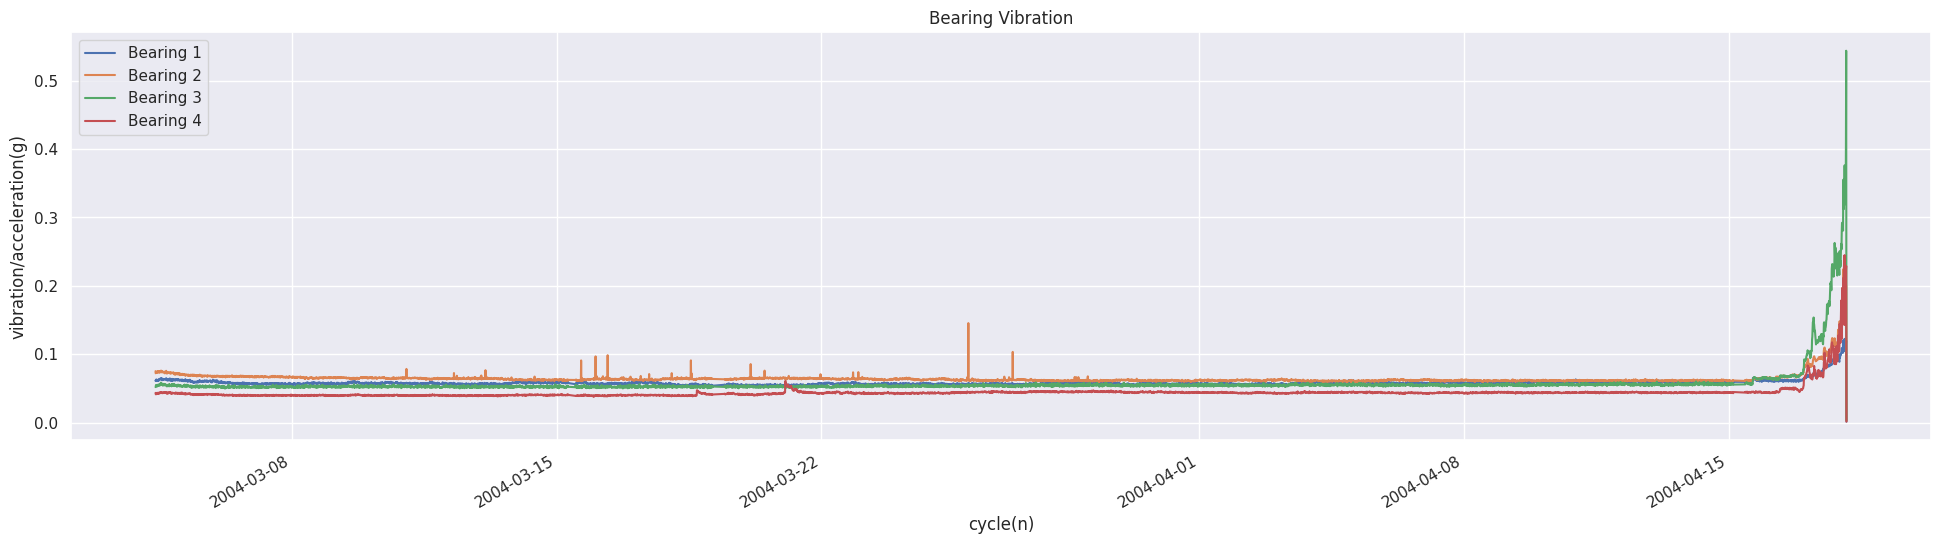

In [5]:
ax = merged_data.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

Split Data into Train and Test

In [6]:
split_index = int(0.7 * len(merged_data))

train_data = merged_data.iloc[:split_index]
test_data = merged_data.iloc[split_index:]

Normalize Data

In [7]:
scaler = preprocessing.MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns, index=train_data.index)
X_test = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns, index=test_data.index)

AutoEncoders to Get the Anomalies based on Reconstruction Error

In [17]:
tf.random.set_seed(10)
autoencoder = Sequential([
    Dense(10, activation='elu', kernel_regularizer=regularizers.l2(0.0), input_shape=(X_train.shape[1],)),
    Dense(2, activation='elu'),
    Dense(10, activation='elu'),
    Dense(X_train.shape[1])
])

autoencoder.compile(optimizer='adam', loss='mse')

In [18]:
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=10, validation_split=0.05, verbose=1)

Epoch 1/100
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0229 - val_loss: 0.0027
Epoch 2/100
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 3/100
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 4/100
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 5/100
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 6/100
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7/100
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/100
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 9/100
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 10/100
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 11/100
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 12/100
421/421 ━━━━━━━━━━━━━━━━━━━━

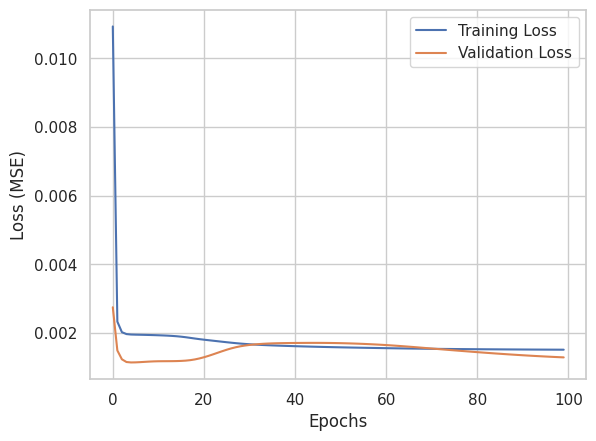

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show()

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


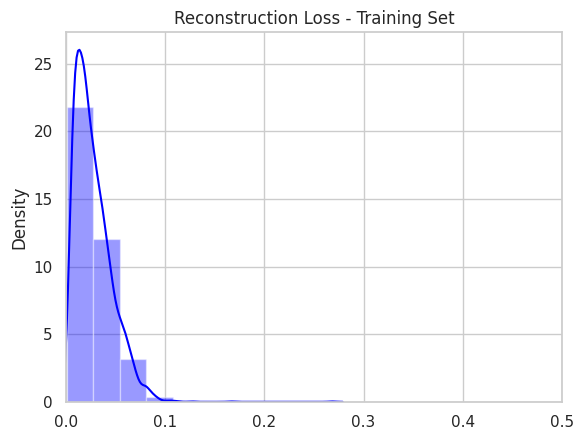

In [20]:
X_train_pred = autoencoder.predict(X_train)
train_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.figure()
sns.distplot(train_loss, bins=10, kde=True, color='blue')
plt.title("Reconstruction Loss - Training Set")
plt.xlim([0.0, 0.5])
plt.show()

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


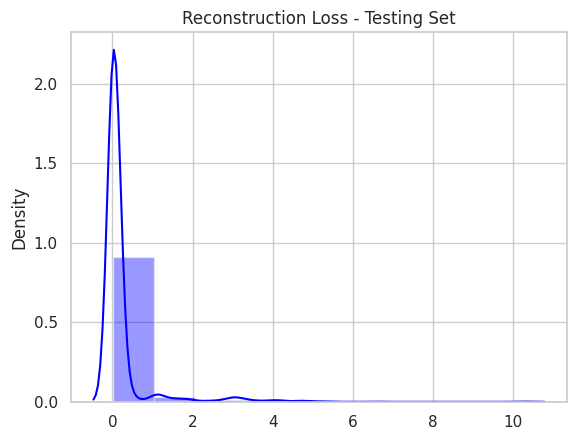

In [21]:
X_test_pred = autoencoder.predict(X_test)
test_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)
plt.figure()
sns.distplot(test_loss, bins=10, kde=True, color='blue')
plt.title("Reconstruction Loss - Testing Set")
plt.show()

In [22]:
combined_loss = np.concatenate([train_loss, test_loss])
def calc_combined_threshold(loss, extreme=False):
    k = 3 if extreme else 2
    return np.mean(loss) + k * np.std(loss)

In [23]:
threshold_combined = calc_combined_threshold(combined_loss, extreme=True)
print(f"Combined Threshold for Anomalies: {threshold_combined}")

Combined Threshold for Anomalies: 1.2993571902266745


In [24]:
reconstruction_errors = pd.DataFrame(index=X_train.index.append(X_test.index))
reconstruction_errors['Reconstruction Error'] = np.concatenate([train_loss, test_loss])
reconstruction_errors['Anomaly'] = reconstruction_errors['Reconstruction Error'] > threshold_combined

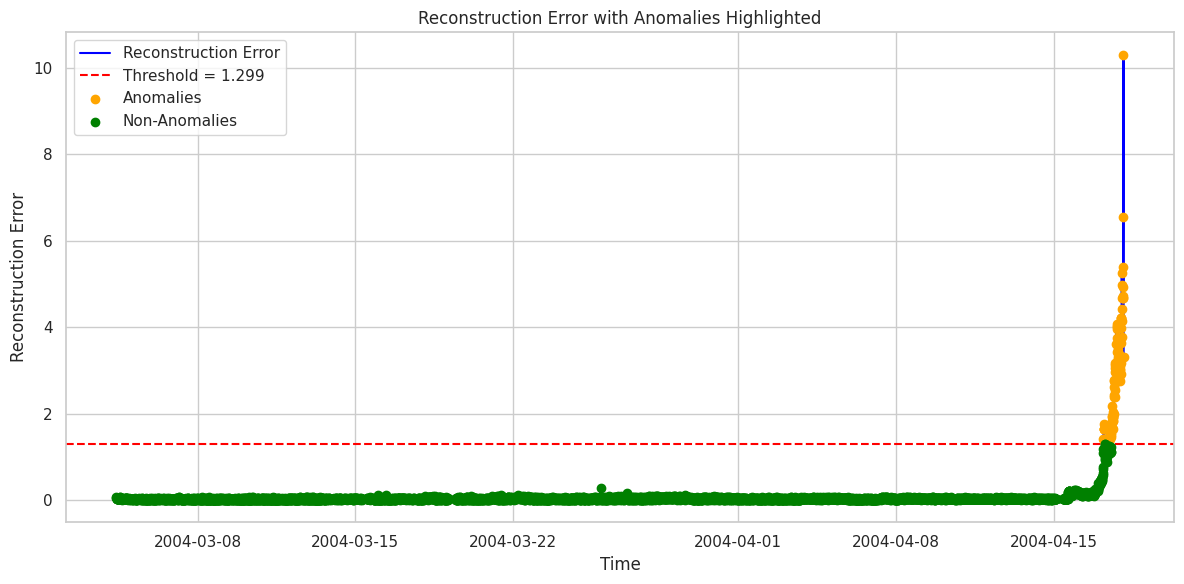

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors.index, reconstruction_errors['Reconstruction Error'], label='Reconstruction Error', color='blue')
plt.axhline(y=threshold_combined, color='red', linestyle='--', label=f'Threshold = {threshold_combined:.3f}')
anomalies_combined = reconstruction_errors[reconstruction_errors['Anomaly'] == True]
plt.scatter(anomalies_combined.index, anomalies_combined['Reconstruction Error'], color='orange', label='Anomalies', zorder=5)
non_anomalies_combined = reconstruction_errors[reconstruction_errors['Anomaly'] == False]
plt.scatter(non_anomalies_combined.index, non_anomalies_combined['Reconstruction Error'], color='green', label='Non-Anomalies', zorder=5)
plt.title('Reconstruction Error with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Reconstruction Error')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
if merged_data.index.duplicated().any():
    merged_data = merged_data[~merged_data.index.duplicated(keep='first')]

if reconstruction_errors.index.duplicated().any():
    reconstruction_errors = reconstruction_errors[~reconstruction_errors.index.duplicated(keep='first')]

reconstruction_errors_aligned = reconstruction_errors.reindex(merged_data.index)
merged_data['Anomaly'] = reconstruction_errors_aligned['Anomaly']

In [27]:
merged_data.to_csv('AnomalyDetection/BearingTest_3_Anomalies.csv')

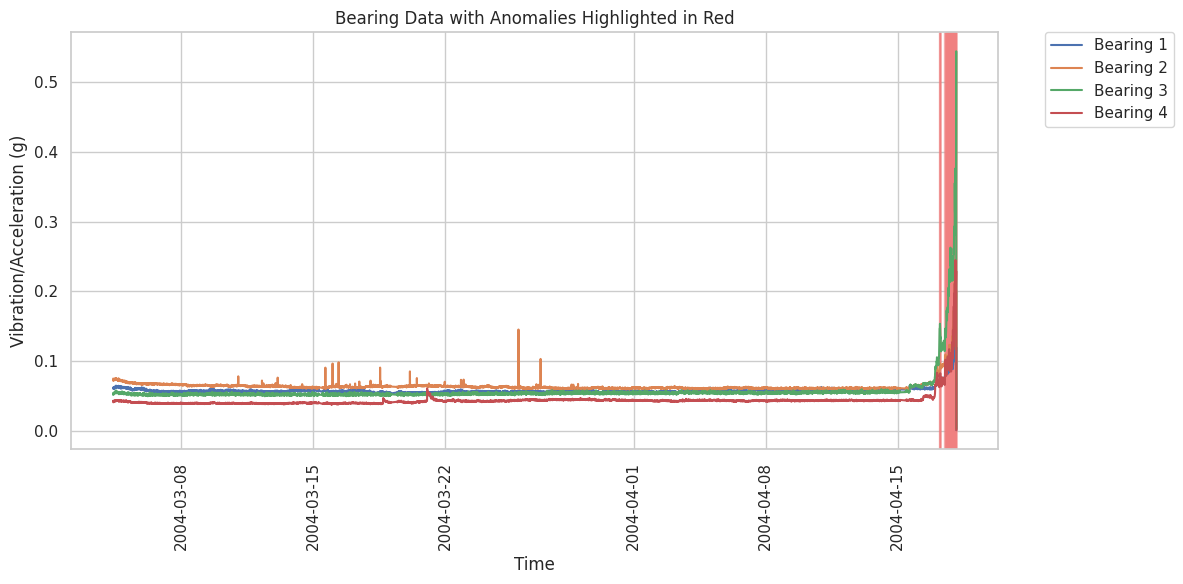

In [29]:
plt.figure(figsize=(12, 6))

for col in merged_data.columns[:-1]:
    plt.plot(merged_data.index, merged_data[col], label=col)

for i in range(len(merged_data) - 1):
    if merged_data['Anomaly'].iloc[i]:
        plt.axvspan(merged_data.index[i], merged_data.index[i + 1], color='lightcoral', alpha=0.5)

plt.title("Bearing Data with Anomalies Highlighted in Red")
plt.xlabel("Time")
plt.ylabel("Vibration/Acceleration (g)")
plt.xticks(rotation=90)
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


In the plot abive for Set 3, the vibration/acceleration values remain stable for most of the test, but towards the end (around mid-April 2004), Bearing 3 (green line) exhibits a sharp increase in vibration, indicating significant deterioration. This matches the description of outer race failure in Bearing 3, as the anomaly is clearly highlighted by the red-shaded regions at the end of the test. Other bearings show relatively stable behavior, further confirming that the failure was isolated to Bearing 3.

Thus, the plot supports the description, with the sharp rise in vibration for Bearing 3 aligning with the outer race failure event.